<a href="https://colab.research.google.com/github/Bhupathivishwanath/ailearning/blob/master/final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Anaylsis  

In [1]:
import pandas as pd
import subprocess
import sys
import matplotlib.pyplot as plt

# Ensure required packages are installed
def install_package(package):
    try:
        __import__(package)
    except ModuleNotFoundError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install_package("pandas")
install_package("matplotlib")

# Load Excel file
file_path = "https://datacatalogfiles.worldbank.org/ddh-published-v2/0037740/31/DR0092145/SDDS_QEDS_Data_Availability_2024Q3_v2.xlsx"
xls = pd.ExcelFile(file_path)

# Load and clean data
df = pd.read_excel(xls, sheet_name="SDDS", skiprows=4)
df.columns = df.iloc[0]  # Set first row as header
df = df[1:].reset_index(drop=True)  # Remove redundant header row
df = df.dropna(axis=1, how="all")  # Drop fully empty columns

# Rename columns
df.columns = [
    "Index", "Country", "1st_QTR", "Last_QTR", "1st_QTR_reported", "Last_QTR_reported",
    "T1", "T2", "T3", "T4", "T1.1", "T1.2", "T1.3", "T1.4", "T1.5", "T1.6", "T2.1", "T3.1", "T3.2"
]
df = df[1:].reset_index(drop=True)

# Convert columns to appropriate types
df["Index"] = pd.to_numeric(df["Index"], errors="coerce")
df["1st_QTR"] = pd.to_datetime(df["1st_QTR"], errors="coerce")
df["Last_QTR"] = pd.to_datetime(df["Last_QTR"], errors="coerce")
df["1st_QTR_reported"] = pd.to_datetime(df["1st_QTR_reported"], errors="coerce")
df["Last_QTR_reported"] = pd.to_datetime(df["Last_QTR_reported"], errors="coerce")

# Convert 'x' indicators to Boolean values
for col in ["T1", "T2", "T3", "T4", "T1.1", "T1.2", "T1.3", "T1.4", "T1.5", "T1.6", "T2.1", "T3.1", "T3.2"]:
    df[col] = df[col].apply(lambda x: True if x == "x" else False)

# Data Wrangling
# Fill missing values in date columns with the earliest available date
date_columns = ["1st_QTR", "Last_QTR", "1st_QTR_reported", "Last_QTR_reported"]
df[date_columns] = df[date_columns].fillna(df[date_columns].min())

# Create a new column for reporting delay (Last_QTR_reported - Last_QTR)
df["Reporting_Delay_Days"] = (df["Last_QTR_reported"] - df["Last_QTR"]).dt.days

# Filter data for countries that reported at least one table
df_reported = df[df.iloc[:, 6:].any(axis=1)]

# Sort by Reporting Delay in descending order
df_sorted = df_reported.sort_values(by="Reporting_Delay_Days", ascending=False)

# Data Aggregation
# Group by Country and count the number of reported tables
df_aggregated = df.iloc[:, 6:].groupby(df["Country"]).sum()

# Descriptive statistics
numeric_summary = df.describe()
categorical_summary = df["Country"].nunique()
table_availability = df.iloc[:, 6:].sum()


# Print results
print("Numeric Summary:\n", numeric_summary)
print("\nNumber of Unique Countries:", categorical_summary)
print("\nTable Availability Count:\n", table_availability)
print("\nTop Countries with Highest Reporting Delays:\n", df_sorted[["Country", "Reporting_Delay_Days"]].head(10))
print("\nAggregated Table Report Count by Country:\n", df_aggregated)


Numeric Summary:
          Index                        1st_QTR             Last_QTR  \
count  80.0000                             84                   84   
mean   40.5000  2001-09-21 07:08:34.285714304  2008-08-19 00:00:00   
min     1.0000            1998-01-01 00:00:00  1999-10-01 00:00:00   
25%    20.7500            1998-01-01 00:00:00  1999-10-01 00:00:00   
50%    40.5000            2002-10-01 00:00:00  2012-02-15 12:00:00   
75%    60.2500            2003-07-01 00:00:00  2013-04-01 00:00:00   
max    80.0000            2013-04-01 00:00:00  2024-07-01 00:00:00   
std    23.2379                            NaN                  NaN   

                    1st_QTR_reported              Last_QTR_reported  \
count                             84                             84   
mean   2008-10-25 18:51:25.714285824  2024-01-27 13:25:42.857142784   
min              1998-01-01 00:00:00            2021-04-01 00:00:00   
25%              2002-01-01 00:00:00            2024-07-01 00:00:00

<ipython-input-1-03efa1bba7f3>:35: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["1st_QTR"] = pd.to_datetime(df["1st_QTR"], errors="coerce")
<ipython-input-1-03efa1bba7f3>:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Last_QTR"] = pd.to_datetime(df["Last_QTR"], errors="coerce")
<ipython-input-1-03efa1bba7f3>:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["1st_QTR_reported"] = pd.to_datetime(df["1st_QTR_reported"], errors="coerce")
<ipython-input-1-03efa1bba7f3>:38: UserWarning: Could not infer format, so each element will be parsed individually, falling bac

# Data Visualization

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
data_url = "https://datacatalogfiles.worldbank.org/ddh-published-v2/0037740/31/DR0092145/SDDS_QEDS_Data_Availability_2024Q3_v2.xlsx"
df = pd.read_excel(data_url, sheet_name="SDDS", skiprows=4)
df = df.iloc[1:].reset_index(drop=True).dropna(axis=1, how="all")
df.columns = [
    "Index", "Country", "1st_QTR", "Last_QTR", "1st_QTR_reported", "Last_QTR_reported",
    "T1", "T2", "T3", "T4", "T1.1", "T1.2", "T1.3", "T1.4", "T1.5", "T1.6", "T2.1", "T3.1", "T3.2"
]

# Convert data types
date_cols = ["1st_QTR", "Last_QTR", "1st_QTR_reported", "Last_QTR_reported"]
df[date_cols] = df[date_cols].apply(pd.to_datetime, errors="coerce")
for col in df.columns[6:]:
    df[col] = df[col] == "x"

df["Reporting_Delay_Days"] = (df["Last_QTR_reported"] - df["Last_QTR"]).dt.days
df_filtered = df[df.iloc[:, 6:].any(axis=1)]
df_sorted = df_filtered.sort_values(by="Reporting_Delay_Days", ascending=False)

<ipython-input-2-33eaa55a8821>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_cols] = df[date_cols].apply(pd.to_datetime, errors="coerce")
<ipython-input-2-33eaa55a8821>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_cols] = df[date_cols].apply(pd.to_datetime, errors="coerce")
<ipython-input-2-33eaa55a8821>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_cols] = df[date_cols].apply(pd.to_datetime, errors="coerce")
<ipython-input-2-33eaa55a8821>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back 

# 1. Bar Chart: Top 10 Countries with Highest Reporting Delays

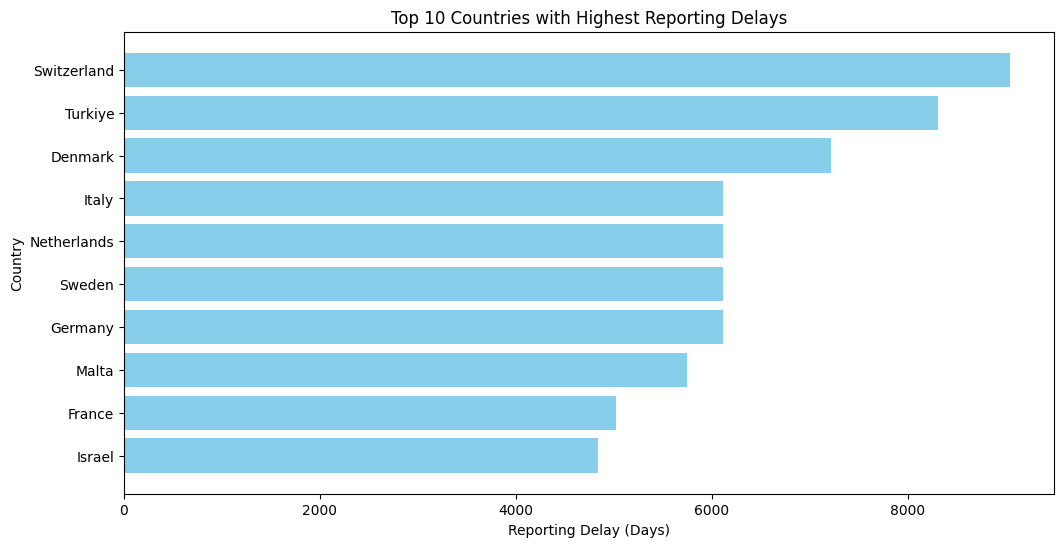

In [6]:

# Bar Chart: Top 10 Countries with Highest Reporting Delay
plt.figure(figsize=(12, 6))
top_delays = df_sorted.head(10)
plt.barh(top_delays["Country"], top_delays["Reporting_Delay_Days"], color="skyblue")
plt.xlabel("Reporting Delay (Days)")
plt.ylabel("Country")
plt.title("Top 10 Countries with Highest Reporting Delays")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

# 2. Area Chart: Trend of Reporting Delays Over Time

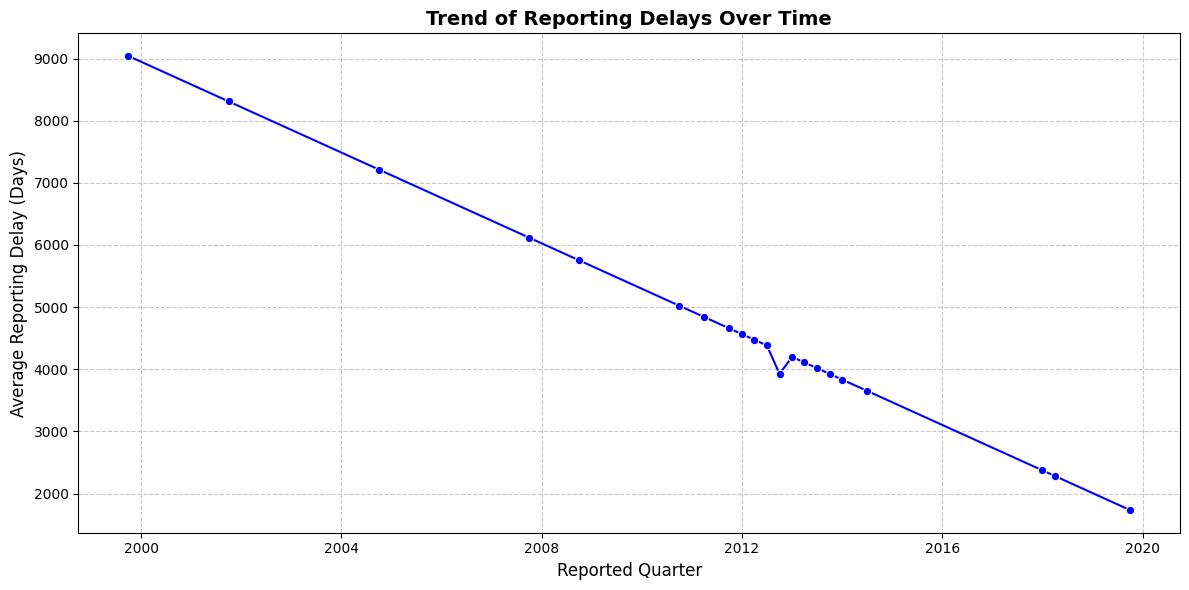

In [7]:
def plot_reporting_trends(df_sorted):
    df_trend = df_sorted.groupby("Last_QTR")["Reporting_Delay_Days"].mean().reset_index()
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_trend, x="Last_QTR", y="Reporting_Delay_Days", marker='o', color='b')
    plt.xlabel("Reported Quarter", fontsize=12)
    plt.ylabel("Average Reporting Delay (Days)", fontsize=12)
    plt.title("Trend of Reporting Delays Over Time", fontsize=14, fontweight="bold")
    plt.grid(linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_reporting_trends(df_sorted)

# 3. Diverging Heatmap: Correlation Between Reported Tables and Reporting Delays

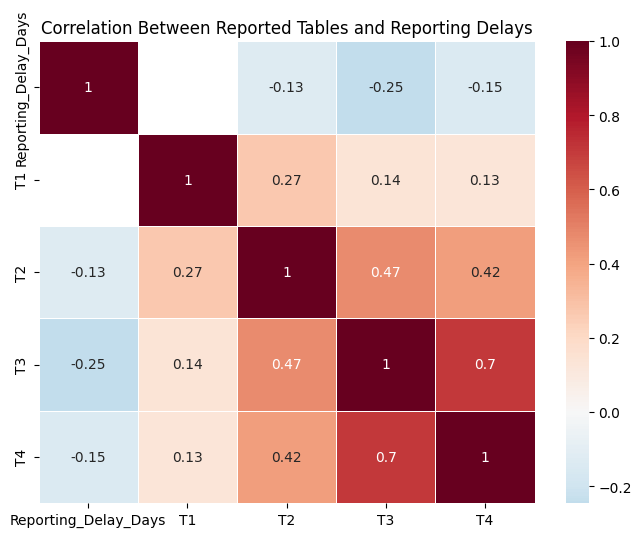

In [5]:
table_columns = ["T1", "T2", "T3", "T4"]
df_corr = df[["Reporting_Delay_Days"] + table_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap="RdBu_r", center=0, linewidths=0.5)
plt.title("Correlation Between Reported Tables and Reporting Delays")
plt.show()